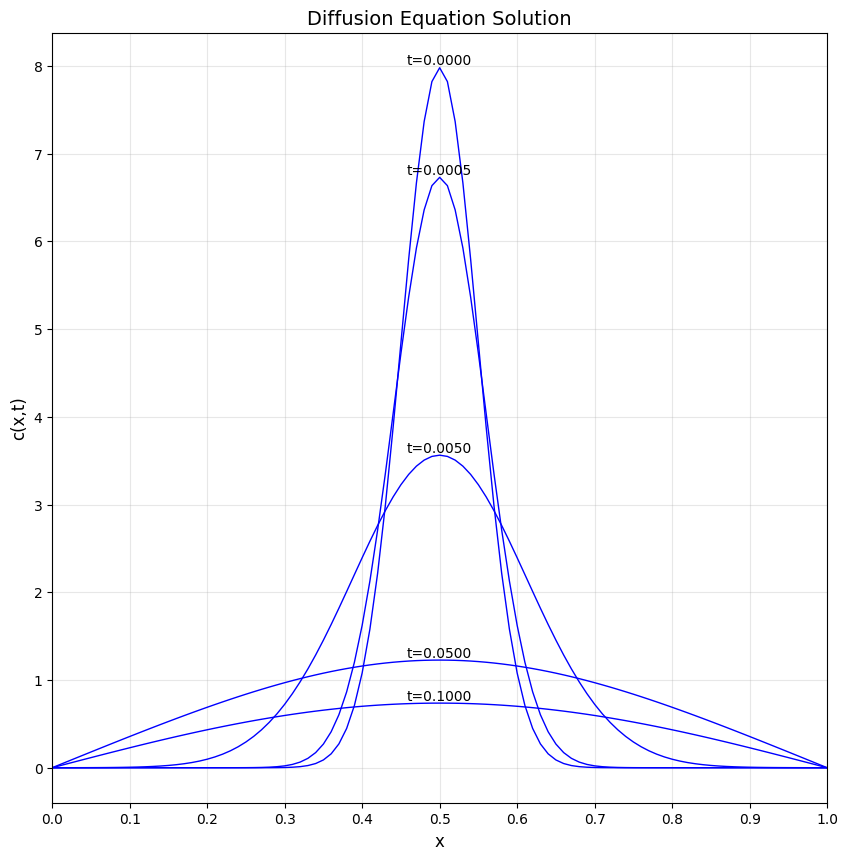

In [ ]:
"""
扩散方程数值求解程序（一维显式差分格式）
采用有限差分法求解扩散方程 ∂c/∂t = α ∂²c/∂x²
边界条件：默认零梯度边界（Neumann边界条件）
初始条件：高斯分布浓度场
"""

# ==================== 导入依赖库 ====================
import numpy as np               # 数值计算库
import matplotlib.pyplot as plt  # 绘图库

# ==================== 参数设置 ======================
Nx = 100                         # 空间网格划分数量（注意实际节点数为Nx+1）
Nt = 2000                        # 时间步进总数
L = 1.0                          # 空间域长度（0 ≤ x ≤ L）
T = 0.1                          # 总模拟时间（0 ≤ t ≤ T）
dx = L / Nx                      # 空间步长
dt = T / Nt                      # 时间步长

mu = 0.5                         # 高斯分布均值（初始浓度中心位置）
sigma = 0.05                     # 高斯分布标准差（初始浓度扩散程度）

# ==================== 初始条件 ======================
def initial_condition(x):
    """
    定义初始浓度分布（高斯函数）
    参数：
        x : 空间坐标值
    返回：
        标准高斯分布值（面积归一化）
    """
    return np.exp(-((x - mu) ** 2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))


# 初始化浓度场数组（时间维度在前，空间维度在后）
c = np.zeros((Nt + 1, Nx + 1))   # 创建(Nt+1)×(Nx+1)的二维数组

# 设置初始条件（t=0时的浓度分布）
for n in range(Nx - 1):
    c[0, n + 1] = initial_condition((n + 1) * dx)

# ==================== 数值求解 ======================
alpha = dt / dx**2               # 计算扩散系数组合参数（需满足α ≤ 0.5保证稳定性）

# 时间迭代（显式差分格式）
for i in range(Nt):
    # 空间遍历（注意边界处理：j=0和j=Nx保持初始零值）
    for j in range(1, Nx):
        # 有限差分公式：c^{n+1}_j = α*c^n_{j-1} + (1-2α)*c^n_j + α*c^n_{j+1}
        c[i + 1, j] = (
            alpha * c[i, j - 1] + (1 - 2 * alpha) * c[i, j] + alpha * c[i, j + 1]
        )

# ==================== 结果可视化 ====================
x = np.linspace(0, L, Nx + 1)    # 生成空间坐标数组
plt.figure(figsize=(10, 10))     # 创建画布

# 绘制指定时刻的浓度分布曲线
for i in [0, 10, 100, 1000, 2000]:
    plt.plot(x, c[i, :], "b-", linewidth=1)
    # 添加时间标签（显示在曲线中央上方）
    plt.text(0.5, c[i, 50], f"t={i * dt:.4f}", ha="center", va="bottom", fontsize=10)

# 设置图形属性
plt.title("Diffusion Equation Solution", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("c(x,t)", fontsize=12)
plt.xlim(0, L)                          # 固定x轴范围便于对比
plt.xticks(np.arange(0, L + 0.1, 0.1))  # 设置x轴刻度
plt.grid(alpha=0.3)                     # 添加半透明网格线

plt.show()
